In [1]:
## Plot performance
def plot_performance(pixel_results):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # Define model order
    model_order = ['CDD', 'DM', 'SIAM', 'SIAMN', 'SIAMNP']

    # Define custom colors per model
    model_colors = {
        'CDD': '#A3D4E0',  
        'DM': '#5BAED8',
        'SIAM': '#3B83C4', 
        'SIAMN': '#EA9E88',
        'SIAMNP': '#D1837D'
    }
    # Collect RMSE, R², slope data
    plot_data = []
    for pixel in pixel_results:
        for model_name in model_order:
            rmse = pixel.get('test_rmse', {}).get(model_name, np.nan)
            r2 = pixel.get('test_r2', {}).get(model_name, np.nan)
            slope = pixel.get('test_slope', {}).get(model_name, np.nan)
            plot_data.append({'model': model_name, 'rmse': rmse, 'r2': r2, 'slope': slope})

    plot_df = pd.DataFrame(plot_data)

    # Metrics to plot
    metrics = {
        'rmse': {'title': 'RMSE (days)', 'ylabel': 'RMSE (days)'},
        'r2': {'title': 'R²', 'ylabel': 'R²'},
        'slope': {'title': 'Regression slope', 'ylabel': 'Slope'}
    }

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False)

    for ax, (metric, meta) in zip(axes, metrics.items()):
        if metric != 'slope':
            # Bar plot for RMSE and R²
            mean_vals = []
            half_std_vals = []
            for m in model_order:
                vals = plot_df.loc[plot_df['model']==m, metric].dropna()
                mean_vals.append(vals.mean() if not vals.empty else np.nan)
                half_std_vals.append(vals.std()/2 if not vals.empty else 0)

            bars = ax.bar(
                x=model_order,
                height=mean_vals,
                yerr=half_std_vals,
                capsize=5,
                color=[model_colors.get(m, '#cccccc') for m in model_order]
            )

            # Annotate bars with mean
            for bar, mean_val, err in zip(bars, mean_vals, half_std_vals):
                if not np.isnan(mean_val):
                    ax.text(
                        bar.get_x() + bar.get_width()/2,
                        mean_val + err + 0.02,
                        f'{mean_val:.2f}',
                        ha='center',
                        va='bottom',
                        fontsize=12
                    )
            ax.set_xticks(range(len(model_order)))
            ax.set_xticklabels(model_order, rotation=45, ha='right', fontsize=12)
            if metric == 'rmse':
                ax.set_ylabel('RMSE (days)', fontsize=14)
                ax.set_ylim(0, 15) 

                ax.set_yticks([0, 4, 8, 12]) 
    
            else:
                ax.set_ylabel('R²', fontsize=14)
                ax.set_yticks([0.1, 0.2, 0.3]) 


            ax.tick_params(axis='x', labelsize=12)  # x tick labels font size
            ax.tick_params(axis='y', labelsize=12)  # x tick labels font size

        else:
            # Box plot for slope
            box_data = [plot_df.loc[plot_df['model'] == m, 'slope'].dropna() for m in model_order]
            positions = np.arange(len(model_order))
        
            bplot = ax.boxplot(
                box_data,
                positions=positions,
                patch_artist=True,
                showfliers=False,   # Do not show outliers
                whiskerprops={'visible': True},  # Keep whisker but remove caps later
                capprops={'visible': False}      # No caps
            )
            ax.set_ylabel('Slope', fontsize=14)
            ax.set_yticks([-2, -1, 0, 1, 2])
            ax.axhline(y=1, color='black', linestyle='--', linewidth=1)

            ax.tick_params(axis='x', labelsize=12)  # x tick labels font size
            ax.tick_params(axis='y', labelsize=12)  # x tick labels font size
            # Set box face color
            for patch, m in zip(bplot['boxes'], model_order):
                patch.set_facecolor(model_colors.get(m, '#cccccc'))
        
            for median_line, m in zip(bplot['medians'], model_order):
                median_line.set_color('black')
                median_line.set_linewidth(1)
                median_line.set_zorder(3)  # make sure it is above the box patch
        
            # Annotate boxes with mean values and add text above the maximum value
            for i, m in enumerate(model_order):
                vals = plot_df.loc[plot_df['model'] == m, 'slope'].dropna()
                mean_val = vals.mean() if not vals.empty else np.nan
                max_val = vals.max() if not vals.empty else np.nan  # Calculate the maximum value
                q75 = np.percentile(vals, 75) if not vals.empty else np.nan  # 75th percentile
        
                if not np.isnan(mean_val) and not np.isnan(max_val):
                    # Add the mean value text above the 75th percentile
                    if m == 'SIAMN' or m == 'SIAMNP':
                        ax.text(i, 2.4, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=12)
                    else: 
                        ax.text(i, 1.2, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=12)

                    # Add a black 'x' marker at the mean value
                    ax.plot(i, mean_val, marker='x', color='black', markersize=10)  # Black 'x' marker for mean
            ax.set_xticklabels(model_order, rotation=45, ha='right', fontsize=14)
    for ax in axes:
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

    # Set x-ticks and labels
    ax.set_xticks(positions)
    plt.tight_layout()
    return fig


Plot Fig. 4a

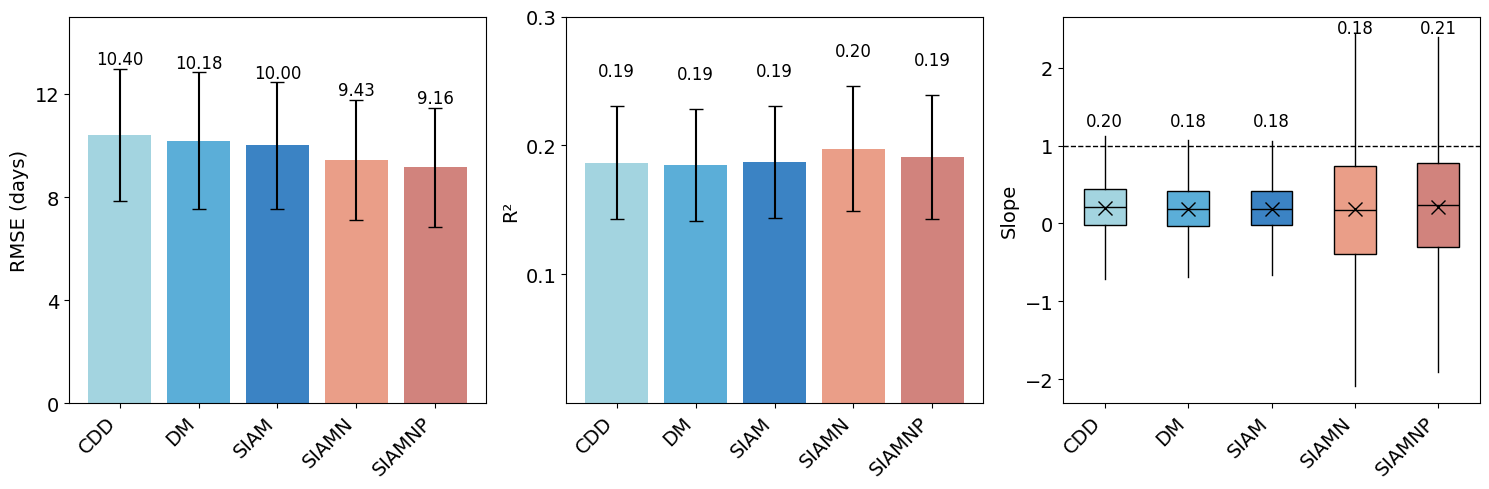

In [5]:
import pandas as pd
evaluation_results1 = pd.read_pickle("../model/data/tables/params/1982-2016/evaluation_results_1600_3200.pkl")
evaluation_results2 = pd.read_pickle("../model/data/tables/params/1982-2016/evaluation_results_0000_1600.pkl")
evaluation_results = evaluation_results1 + evaluation_results2
fig = plot_performance(evaluation_results)
fig.savefig("../results/figure4/model_evaluation_avhrr.png", dpi=300, bbox_inches='tight')

In [6]:
## Plot performance
def plot_performance(pixel_results):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # Define model order
    model_order = ['CDD', 'DM', 'SIAM', 'SIAMN', 'SIAMNP']

    # Define custom colors per model
    model_colors = {
        'CDD': '#A3D4E0',
        'DM': '#5BAED8',
        'SIAM': '#3B83C4',
        'SIAMN': '#EA9E88',
        'SIAMNP': '#D1837D'
    }
    # Collect RMSE, R², slope data
    plot_data = []
    for pixel in pixel_results:
        for model_name in model_order:
            rmse = pixel.get('test_rmse', {}).get(model_name, np.nan)
            r2 = pixel.get('test_r2', {}).get(model_name, np.nan)
            slope = pixel.get('test_slope', {}).get(model_name, np.nan)
            plot_data.append({'model': model_name, 'rmse': rmse, 'r2': r2, 'slope': slope})

    plot_df = pd.DataFrame(plot_data)

    # Metrics to plot
    metrics = {
        'rmse': {'title': 'RMSE (days)', 'ylabel': 'RMSE (days)'},
        'r2': {'title': 'R²', 'ylabel': 'R²'},
        'slope': {'title': 'Regression slope', 'ylabel': 'Slope'}
    }

    fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=False)

    for ax, (metric, meta) in zip(axes, metrics.items()):
        if metric != 'slope':
            # Bar plot for RMSE and R²
            mean_vals = []
            half_std_vals = []
            for m in model_order:
                vals = plot_df.loc[plot_df['model']==m, metric].dropna()
                mean_vals.append(vals.mean() if not vals.empty else np.nan)
                half_std_vals.append(vals.std()/2 if not vals.empty else 0)

            bars = ax.bar(
                x=model_order,
                height=mean_vals,
                yerr=half_std_vals,
                capsize=5,
                color=[model_colors.get(m, '#cccccc') for m in model_order]
            )

            # Annotate bars with mean
            for bar, mean_val, err in zip(bars, mean_vals, half_std_vals):
                if not np.isnan(mean_val):
                    ax.text(
                        bar.get_x() + bar.get_width()/2,
                        mean_val + err + 0.02,
                        f'{mean_val:.2f}',
                        ha='center',
                        va='bottom',
                        fontsize=12
                    )
            ax.set_xticks(range(len(model_order)))
            ax.set_xticklabels(model_order, rotation=45, ha='right', fontsize=12)
            if metric == 'rmse':
                ax.set_ylabel('RMSE (days)', fontsize=14)
                ax.set_yticks([0, 4, 8, 12, 16])
                ax.set_ylim(0, 17)
    
            else:
                ax.set_ylabel('R²', fontsize=14)
                ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]) 

                
            ax.tick_params(axis='x', labelsize=12)  # x tick labels font size
            ax.tick_params(axis='y', labelsize=12)  # x tick labels font size

        else:
            # Box plot for slope
            box_data = [plot_df.loc[plot_df['model'] == m, 'slope'].dropna() for m in model_order]
            positions = np.arange(len(model_order))
        
            bplot = ax.boxplot(
                box_data,
                positions=positions,
                patch_artist=True,
                showfliers=False,   # Do not show outliers
                whiskerprops={'visible': True},  # Keep whisker but remove caps later
                capprops={'visible': False}      # No caps
            )
            ax.set_ylabel('Slope', fontsize=14)
            ax.set_yticks([0, 0.5, 1, 1.5]) 
            ax.axhline(y=1, color='black', linestyle='--', linewidth=1)

            ax.tick_params(axis='x', labelsize=12)  # x tick labels font size
            ax.tick_params(axis='y', labelsize=12)  # x tick labels font size
            # Set box face color
            for patch, m in zip(bplot['boxes'], model_order):
                patch.set_facecolor(model_colors.get(m, '#cccccc'))
        
            for median_line, m in zip(bplot['medians'], model_order):
                median_line.set_color('black')
                median_line.set_linewidth(1)
                median_line.set_zorder(3)  # make sure it is above the box patch
        
            # Annotate boxes with mean values and add text above the maximum value
            for i, m in enumerate(model_order):
                vals = plot_df.loc[plot_df['model'] == m, 'slope'].dropna()
                mean_val = vals.mean() if not vals.empty else np.nan
                max_val = vals.max() if not vals.empty else np.nan  # Calculate the maximum value
                q75 = np.percentile(vals, 75) if not vals.empty else np.nan  # 75th percentile
        
                if not np.isnan(mean_val) and not np.isnan(max_val):
                    # Add the mean value text above the 75th percentile
                    if m == 'SIAMN' or m == 'SIAMNP':
                        ax.text(i, 0.5, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=12)
                    elif m == 'DM':
                        ax.text(i, 0.85, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=12)
                    else:
                        ax.text(i, 0.7, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=12)

                    # Add a black 'x' marker at the mean value
                    ax.plot(i, mean_val, marker='x', color='black', markersize=10)  # Black 'x' marker for mean
                    ax.set_xticklabels(model_order, rotation=45, ha='right')

    for ax in axes:
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)    
    # Set x-ticks and labels
    ax.set_xticks(positions)
    plt.tight_layout()
    return fig


Plot Fig. 4a

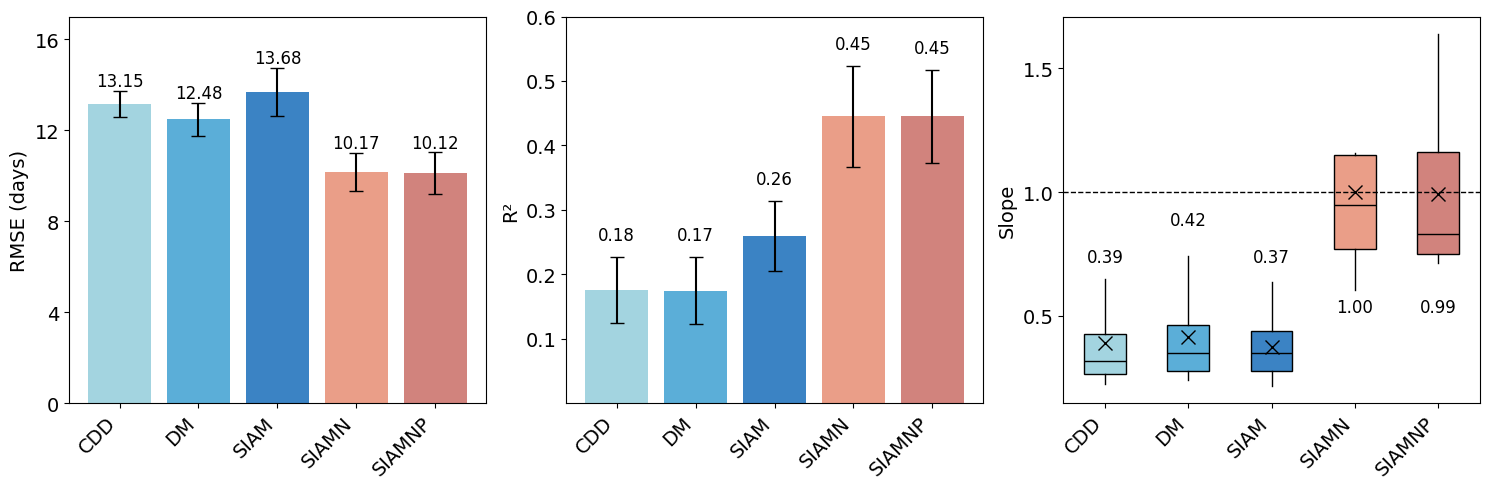

In [7]:
import pandas as pd
evaluation_results_spruce = pd.read_pickle("../model/data/tables/params/spruce/evaluation_results_spruce.pkl")
fig = plot_performance(evaluation_results_spruce)
fig.savefig("../results/figure4/model_evaluation_spruce.png", dpi=300, bbox_inches='tight')